In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Hierarchical Clustering Network Model (Ravasz Algorithm)

In [365]:
G = nx.complete_graph(5)

# Set attributes for nodes

for node in G.nodes():
    if node!=0:
        nx.set_node_attributes(G, 'periphery', 'type')

# Set attribute for the first node (core node)
G.nodes[0]['type'] = 'core'

# Creating 4 replicas of the original graph with the same attributes 
satellites = [G.copy() for _ in range(4)]
print(satellites[0].nodes(data=True))

initial_structure = nx.disjoint_union_all([G] + satellites)
print(initial_structure)

# initial_structure.nodes(data=True)

for node, attribute in initial_structure.nodes(data=True):   
    true_center = initial_structure.nodes[0]
    if node > 4 and attribute['type'] == 'periphery':
        initial_structure.add_edge(node, 0)
#         print(f"Node {node} has attributes: {attribute}")



[(0, {'type': 'core'}), (1, {'type': 'periphery'}), (2, {'type': 'periphery'}), (3, {'type': 'periphery'}), (4, {'type': 'periphery'})]
Graph with 25 nodes and 50 edges


In [371]:
# Renaming the first 5 nodes of the structure so that they don't
# add edges from the centre graph of every copy to the first node
for i in range(1,5):
    initial_structure.nodes[i]['type'] = 'core periphery'

print(initial_structure.nodes(data=True))

[(0, {'type': 'core'}), (1, {'type': 'core periphery'}), (2, {'type': 'core periphery'}), (3, {'type': 'core periphery'}), (4, {'type': 'core periphery'}), (5, {'type': 'core'}), (6, {'type': 'periphery'}), (7, {'type': 'periphery'}), (8, {'type': 'periphery'}), (9, {'type': 'periphery'}), (10, {'type': 'core'}), (11, {'type': 'periphery'}), (12, {'type': 'periphery'}), (13, {'type': 'periphery'}), (14, {'type': 'periphery'}), (15, {'type': 'core'}), (16, {'type': 'periphery'}), (17, {'type': 'periphery'}), (18, {'type': 'periphery'}), (19, {'type': 'periphery'}), (20, {'type': 'core'}), (21, {'type': 'periphery'}), (22, {'type': 'periphery'}), (23, {'type': 'periphery'}), (24, {'type': 'periphery'})]


In [373]:
# Generating 4 replicas of the initial structure to get the final structure in order to reproduce 
# hierarchically 
replicas = [initial_structure.copy() for _ in range(4)]
final_structure = nx.disjoint_union_all([initial_structure] + replicas)

In [375]:
final_structure.nodes(data=True)

NodeDataView({0: {'type': 'core'}, 1: {'type': 'core periphery'}, 2: {'type': 'core periphery'}, 3: {'type': 'core periphery'}, 4: {'type': 'core periphery'}, 5: {'type': 'core'}, 6: {'type': 'periphery'}, 7: {'type': 'periphery'}, 8: {'type': 'periphery'}, 9: {'type': 'periphery'}, 10: {'type': 'core'}, 11: {'type': 'periphery'}, 12: {'type': 'periphery'}, 13: {'type': 'periphery'}, 14: {'type': 'periphery'}, 15: {'type': 'core'}, 16: {'type': 'periphery'}, 17: {'type': 'periphery'}, 18: {'type': 'periphery'}, 19: {'type': 'periphery'}, 20: {'type': 'core'}, 21: {'type': 'periphery'}, 22: {'type': 'periphery'}, 23: {'type': 'periphery'}, 24: {'type': 'periphery'}, 25: {'type': 'core'}, 26: {'type': 'core periphery'}, 27: {'type': 'core periphery'}, 28: {'type': 'core periphery'}, 29: {'type': 'core periphery'}, 30: {'type': 'core'}, 31: {'type': 'periphery'}, 32: {'type': 'periphery'}, 33: {'type': 'periphery'}, 34: {'type': 'periphery'}, 35: {'type': 'core'}, 36: {'type': 'periphery'

In [377]:
# Adding edges from the new replicas to the centre
for node, attribute in final_structure.nodes(data=True):
    if attribute['type'] == 'periphery':
        final_structure.add_edge(node, 0)

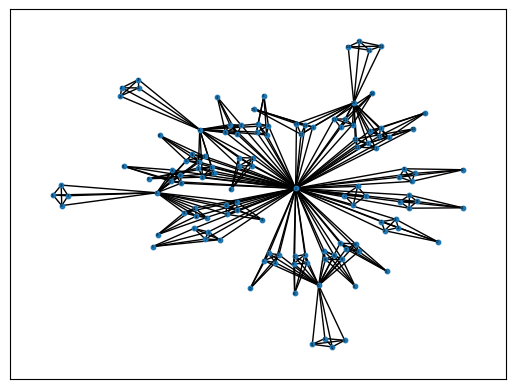

In [378]:
pos = nx.spring_layout(final_structure)
nx.draw_networkx(final_structure, pos, with_labels=True, node_size=10, font_size=2)
plt.show()


In [393]:
# Generating 15625 nodes
cliques = [final_structure.copy() for _ in range(124)]
hierarchical_structure = nx.disjoint_union_all([final_structure] + cliques)

In [395]:
hierarchical_structure.nodes(data=True)

NodeDataView({0: {'type': 'core'}, 1: {'type': 'core periphery'}, 2: {'type': 'core periphery'}, 3: {'type': 'core periphery'}, 4: {'type': 'core periphery'}, 5: {'type': 'core'}, 6: {'type': 'periphery'}, 7: {'type': 'periphery'}, 8: {'type': 'periphery'}, 9: {'type': 'periphery'}, 10: {'type': 'core'}, 11: {'type': 'periphery'}, 12: {'type': 'periphery'}, 13: {'type': 'periphery'}, 14: {'type': 'periphery'}, 15: {'type': 'core'}, 16: {'type': 'periphery'}, 17: {'type': 'periphery'}, 18: {'type': 'periphery'}, 19: {'type': 'periphery'}, 20: {'type': 'core'}, 21: {'type': 'periphery'}, 22: {'type': 'periphery'}, 23: {'type': 'periphery'}, 24: {'type': 'periphery'}, 25: {'type': 'core'}, 26: {'type': 'core periphery'}, 27: {'type': 'core periphery'}, 28: {'type': 'core periphery'}, 29: {'type': 'core periphery'}, 30: {'type': 'core'}, 31: {'type': 'periphery'}, 32: {'type': 'periphery'}, 33: {'type': 'periphery'}, 34: {'type': 'periphery'}, 35: {'type': 'core'}, 36: {'type': 'periphery'

In [398]:
# Adding edges from the new replicas to the centre
for node, attribute in hierarchical_structure.nodes(data=True):
    if attribute['type'] == 'periphery':
        hierarchical_structure.add_edge(node, 0)

In [399]:
# Calculate and store the degree distribution
degree_distribution = [degree for _, degree in hierarchical_structure.degree()]

### 1a) Plotting the degree distributions

In [400]:
cols = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

In [401]:
# Defining the function to plot degree/cumulative distribution

def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [402]:
x1, y1 = plot_degree(degree_distribution, number_of_bins=80, log_binning=True, base=2)

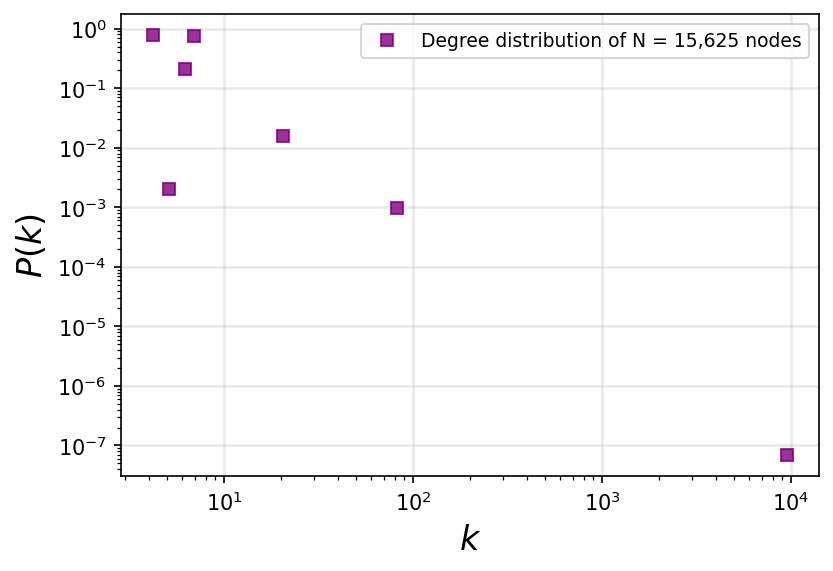

In [406]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'s', color='purple', label='Degree distribution of N = 15,625 nodes', alpha=0.8)

ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=9)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

plt.show()

### Calculating the relationship between clustering coefficient as a function of degree k vs degree k 

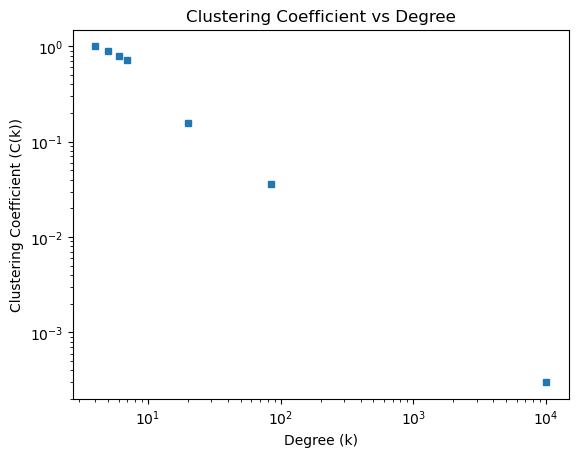

In [409]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Calculate the degree and clustering coefficient for each node
degrees = dict(hierarchical_structure.degree())
clustering_coefficients = nx.clustering(hierarchical_structure)

# Grouping nodes by their degrees
degree_groups = {}
for node, degree in degrees.items():
    if degree not in degree_groups:
        degree_groups[degree] = []
    degree_groups[degree].append(node)

# Calculating average clustering coefficient for each degree group
average_clustering_coefficients = {}
for degree, nodes in degree_groups.items():
    clustering_coefficients_subset = [clustering_coefficients[node] for node in nodes]
    average_clustering_coefficients[degree] = np.mean(clustering_coefficients_subset)

# Plotting the relationship between C(k) and k on a log-log scale
degrees_log = list(average_clustering_coefficients.keys())
clustering_coefficients_log = list(average_clustering_coefficients.values())

plt.loglog(degrees_log, clustering_coefficients_log, 's', markersize=5)
plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient (C(k))')
plt.title('Clustering Coefficient vs Degree')
plt.show()


### Calculating the relationship between the global clustering of the network and network size, C(N) vs N

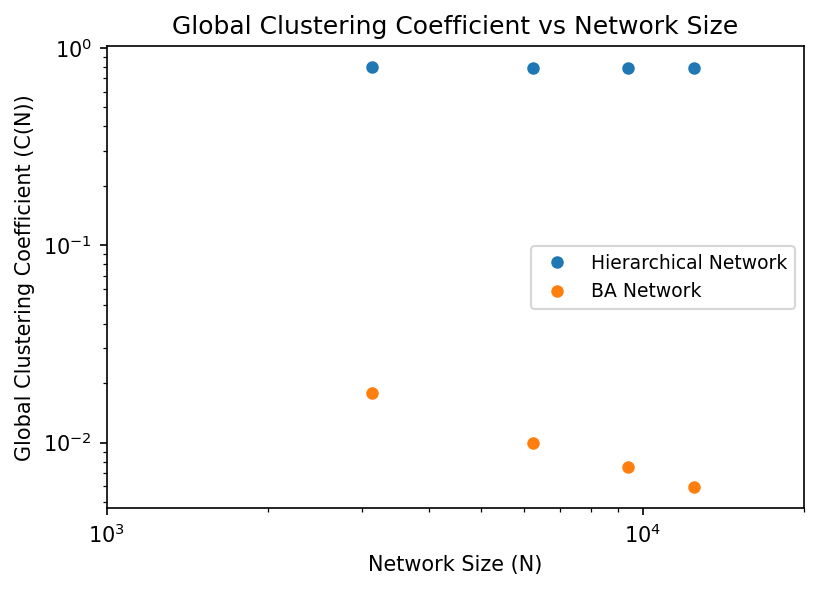

In [421]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Creating lists to store network sizes and corresponding global clustering coefficients
network_sizes = []
global_clustering_coefficients_hier = []
global_clustering_coefficients_ba = []

ba_model = nx.barabasi_albert_graph(15625, 5)

# Varying the network size from 1 to the total number of nodes in the hierarchical network
# it was taking too long to plot all the nodes so i only considered a subsection of it to plot
for size in range(1, hierarchical_structure.number_of_nodes() + 1, 3125):
    # Extract the subgraph with the specified size
    subgraph_hierarchical = hierarchical_structure.subgraph(range(size))
    subgraph_ba = ba_model.subgraph(range(size))

    # Global clustering coefficient for the subgraph
    clustering_coefficient_hier = nx.average_clustering(subgraph_hierarchical)
    clustering_coefficient_ba = nx.average_clustering(subgraph_ba)

    # Appending the network size and corresponding global clustering coefficient to the lists
    network_sizes.append(size)
    global_clustering_coefficients_hier.append(clustering_coefficient_hier)
    global_clustering_coefficients_ba.append(clustering_coefficient_ba)


# Plotting the relationship between C(N) and N on a log-log scale

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)
ax.loglog(network_sizes, global_clustering_coefficients_hier, 'o', label='Hierarchical Network', markersize=5)
ax.loglog(network_sizes, global_clustering_coefficients_ba,'o',label='BA Network' ,markersize=5)

ax.legend(fontsize=9)

# plt.loglog(network_sizes, global_clustering_coefficients, 'o', markersize=5)
# plt.yscale([0, 1])
plt.xlabel('Network Size (N)')
plt.ylabel('Global Clustering Coefficient (C(N))')
plt.title('Global Clustering Coefficient vs Network Size')
plt.xlim(left=1000)
plt.show()


### Simulating an attack on a network with N = 15, 625 nodes generated with the configuration model and power-law degree distribution with γ = 2.5

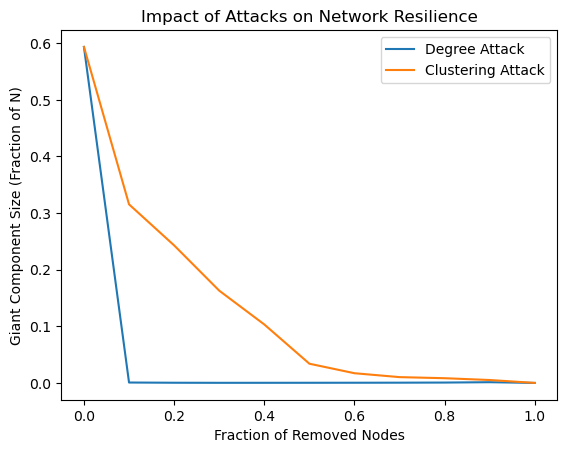

In [412]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a power-law network 
def generate_power_law_network(N, gamma):
    degree_sequence = np.random.zipf(gamma, N)
    G = nx.configuration_model(degree_sequence)
    G = nx.Graph(G)  
    return G

# Function to simulate an attack on the network by removing nodes based on degree
def degree_attack(G, fraction):
    nodes_to_remove = int(fraction * G.number_of_nodes())
    degrees = dict(G.degree())
    sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)[:nodes_to_remove]
    G.remove_nodes_from(sorted_nodes)

# Function to simulate an attack on the network by removing nodes based on clustering coefficient
def clustering_attack(G, fraction):
    nodes_to_remove = int(fraction * G.number_of_nodes())
    clustering = dict(nx.clustering(G))
    sorted_nodes = sorted(clustering, key=clustering.get, reverse=True)[:nodes_to_remove]
    G.remove_nodes_from(sorted_nodes)

# Function to calculate the size of the giant component
def giant_component_size(G):
    components = list(nx.connected_components(G))
    if len(components) > 0:
        return len(max(components, key=len)) / G.number_of_nodes()
    else:
        return 0.0

# Calling the functions 
N = 15625
gamma = 2.5
network = generate_power_law_network(N, gamma)

fractions = np.linspace(0, 1, 11)  # Varying the fraction of removed nodes

# Degree attack
degree_sizes = []
for fraction in fractions:
    G_degree = network.copy()
    degree_attack(G_degree, fraction)
    degree_sizes.append(giant_component_size(G_degree))

# Clustering attack
clustering_sizes = []
for fraction in fractions:
    G_clustering = network.copy()
    clustering_attack(G_clustering, fraction)
    clustering_sizes.append(giant_component_size(G_clustering))

# Plotting the results
plt.plot(fractions, degree_sizes, label='Degree Attack')
plt.plot(fractions, clustering_sizes, label='Clustering Attack')
plt.xlabel('Fraction of Removed Nodes')
plt.ylabel('Giant Component Size (Fraction of N)')
plt.title('Impact of Attacks on Network Resilience')
plt.legend()
plt.show()


### Simulating an attack on a hierarchical network with N = 15,625 nodes

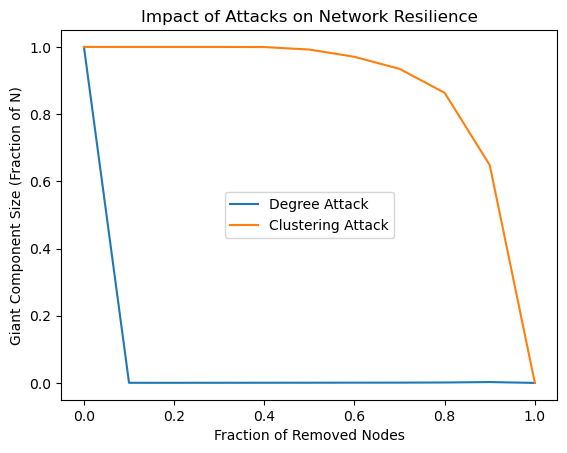

In [413]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Function to simulate an attack on the network by removing nodes based on degree
def degree_attack(G, fraction):
    nodes_to_remove = int(fraction * G.number_of_nodes())
    degrees = dict(G.degree())
    sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)[:nodes_to_remove]
    G.remove_nodes_from(sorted_nodes)

# Function to simulate an attack on the network by removing nodes based on clustering coefficient
def clustering_attack(G, fraction):
    nodes_to_remove = int(fraction * G.number_of_nodes())
    clustering = dict(nx.clustering(G))
    sorted_nodes = sorted(clustering, key=clustering.get, reverse=True)[:nodes_to_remove]
    G.remove_nodes_from(sorted_nodes)

# Function to calculate the size of the GCC
def giant_component_size(G):
    components = list(nx.connected_components(G))
    if len(components) > 0:
        return len(max(components, key=len)) / G.number_of_nodes()
    else:
        return 0.0

# Simulate attacks and plot the results
network = hierarchical_structure

fractions = np.linspace(0, 1, 11)  # Varying the fraction of removed nodes

# Degree attack
degree_sizes = []
for fraction in fractions:
    G_degree = network.copy()
    degree_attack(G_degree, fraction)
    degree_sizes.append(giant_component_size(G_degree))

# Clustering attack
clustering_sizes = []
for fraction in fractions:
    G_clustering = network.copy()
    clustering_attack(G_clustering, fraction)
    clustering_sizes.append(giant_component_size(G_clustering))

# Plotting the results
plt.plot(fractions, degree_sizes, label='Degree Attack')
plt.plot(fractions, clustering_sizes, label='Clustering Attack')
plt.xlabel('Fraction of Removed Nodes')
plt.ylabel('Giant Component Size (Fraction of N)')
plt.title('Impact of Attacks on Network Resilience')
plt.legend()
plt.show()


Topological information in a network can be described as the physical and logical structure of a network. It is the arrangement of nodes and edges that determines how data flows in a network. Thererfore we can see how an adversarial attack on particular well connected nodes could cause the whole network to crash. To determine this we plot an attack on two different types of networks. We simulate an attack on the nodes with highest degree and clustering coefficient in order to determine which would be more lethal to the network. 
As we can see from the graphs above, the attack on the highest degree nodes causes a signinficant drop in the connectedness of the network, regardless of the type of network. An attack on the highest degree nodes(hubs) would be detrimental to the network as they would be connected to a significant portion of the nodes in the network. An attack on the clustering coefficient on the other hand depends on the type of network we are dealing with since it gives information of the number of triangles a node forms. But for both types of networks we can see that an attack based on the highest clustering coefficients is less effective in bringing down the network as opposed to an attack on the degree. The effect of the clustering attack varies depending on the network but it would be more important to not reveal the clustering information of a certain type of network over another. However, the degree information of a network should not be revealed as an adversary with access to this information could easily bring a network down.